In [50]:
nwp_cols="lead_hr,NDNSW,SWDIR,SWDIF,TDSWS,NDNLW,OULWT,DLWS,HPBLA,HFSOIL,LLRIB,UGRD,VGRD,HFSFC,XBLWS,YBLWS,LHTFL,TMP,TMIN,TMAX,SPFH,TOMFS,RH,VIS,DPT,15TL,15QT,VISIP,SHFLT-1,SHFLT-2,SHFLT-3,SHFLT-4,SHFLT-5,SHFLT-6,SHFLT-7,SHFLT-8,HTBM,NETTL-1,NETTL-2,NETTL-3,NETTL-4,NETTL-5,NETTL-6,NETTL-7,NETTL-8,STOT-1,STOT-2,STOT-3,STOT-4,STOT-5,STOT-6,STOT-7,STOT-8,STOT-9,T15T-1,T15T-2,T15T-3,T15T-4,T15T-8,SH15-1,SH15-2,SH15-3,SH15-4,SH15-8,STCP-1,STCP-2,STCP-3,STCP-4,MAXGUST,CBLT,SNOM,SMCL-1,SMCL-2,SMCL-3,SMCL-4,TSOIL-1,TSOIL-2,TSOIL-3,TSOIL-4,ROFR,SROFR,VLCDC,LCDC,MCDC,HCDC,TCAR,TCAM,LCB,TCTH,50MU-min,50MV-min,50MU-max,50MV-max,PRMSL,SNOAL,TMP-SFC,HPBL,PRES"
nwp_cols = nwp_cols.split(',')
output_col = ["OT"]
FCST_cols =['date']
CRTN_cols = ['CRTN_TM']

In [51]:
import pandas as pd
def get_origin_df():
    df = pd.read_csv("clean_dataset/s1_case1.csv")
    nwp_cols="lead_hr,NDNSW,SWDIR,SWDIF,TDSWS,NDNLW,OULWT,DLWS,HPBLA,HFSOIL,LLRIB,UGRD,VGRD,HFSFC,XBLWS,YBLWS,LHTFL,TMP,TMIN,TMAX,SPFH,TOMFS,RH,VIS,DPT,15TL,15QT,VISIP,SHFLT-1,SHFLT-2,SHFLT-3,SHFLT-4,SHFLT-5,SHFLT-6,SHFLT-7,SHFLT-8,HTBM,NETTL-1,NETTL-2,NETTL-3,NETTL-4,NETTL-5,NETTL-6,NETTL-7,NETTL-8,STOT-1,STOT-2,STOT-3,STOT-4,STOT-5,STOT-6,STOT-7,STOT-8,STOT-9,T15T-1,T15T-2,T15T-3,T15T-4,T15T-8,SH15-1,SH15-2,SH15-3,SH15-4,SH15-8,STCP-1,STCP-2,STCP-3,STCP-4,MAXGUST,CBLT,SNOM,SMCL-1,SMCL-2,SMCL-3,SMCL-4,TSOIL-1,TSOIL-2,TSOIL-3,TSOIL-4,ROFR,SROFR,VLCDC,LCDC,MCDC,HCDC,TCAR,TCAM,LCB,TCTH,50MU-min,50MV-min,50MU-max,50MV-max,PRMSL,SNOAL,TMP-SFC,HPBL,PRES"
    nwp_cols = nwp_cols.split(',')
    output_col = ["OT"]
    FCST_cols =['date']
#     CRTN_cols = ['CRTN_TM']
#     all_cols = FCST_cols+nwp_cols+output_col+CRTN_cols
    all_cols = FCST_cols+nwp_cols+output_col
    tmp_df= df[all_cols]

    tmp_df.date = pd.to_datetime(tmp_df.date)
    tmp_df=tmp_df.drop_duplicates()
    tmp_df = tmp_df[tmp_df['lead_hr']!=0]
    tmp_df.reset_index(drop=True)
    return tmp_df

In [52]:
origin_df = get_origin_df()

In [31]:
temp_df  = origin_df.copy()
temp_df['day']=temp_df.date.dt.day
train_df = temp_df[temp_df['day']<=25]
test_df = temp_df[temp_df['day']>25]
df_s1_case2= pd.concat([train_df,test_df])
df_s1_case2=df_s1_case2.drop(columns=['day'])
df_s1_case2.reset_index(drop=True)
df_s1_case2.to_csv("clean_dataset/s1_case2.csv",index=False)

In [25]:
# case s1_3
temp_df  = origin_df.copy()
temp_df['day']=temp_df.date.dt.day
temp_df['month'] = temp_df.date.dt.month

test_df=temp_df[(temp_df['month'].isin([5,8,11,2]))&(temp_df['day'] > 12)]
train_df=temp_df.drop(index=list(test_df.index))
df_s1_case3 = pd.concat([train_df,test_df])

df_s1_case3=df_s1_case3.drop(columns=['day','month'])
df_s1_case3.reset_index(drop=True)
df_s1_case3.to_csv("clean_dataset/s1_case3.csv",index=False)

# 시나리오 2

In [53]:
div = {'mean':'1',
#        'max':'2',
#        'median':'3'
      }

for i in range(1,4):
    for j in div.keys():
        file_name = f'clean_dataset/s2_case{str(i)}_from_s1_case_{div[str(j)]}.csv'
        output_agg_col ={x:'max'for x in output_col}
        nwp_agg_cols={x:j for x in nwp_cols}
        nwp_agg_cols.update(output_agg_col)
        result=origin_df.groupby('date').agg(nwp_agg_cols)
        result=result.reset_index()
        if i ==2 : 
            result['day']=result.date.dt.day
            train_df = result[result['day']<=25]
            test_df = result[result['day']>25]
            result= pd.concat([train_df,test_df])
            result=result.drop(columns=['day'])
            result.reset_index(drop=True)
        elif i==3:
            result['day']=result.date.dt.day
            result['month'] = result.date.dt.month

            test_df=result[(result['month'].isin([5,8,11,2]))&(result['day'] > 12)]
            train_df=result.drop(index=list(test_df.index))
            result = pd.concat([train_df,test_df])
            result=result.drop(columns=['day','month'])
            result.reset_index(drop=True)
        result.to_csv(file_name,index=False)
            
        


# 시나리오 3

In [62]:
import pandas as pd
data_num='1'
scenario_num='3'
dataset = {
    '1':pd.read_csv(f"clean_dataset/s2_case{scenario_num}_from_s1_case_{data_num}.csv"),
#     '3':pd.read_csv(f"clean_dataset/s2_case{scenario_num}_from_s1_case_{data_num}.csv")   
          }
aug_nwp_cols =nwp_cols[1:]

In [63]:
# create s3 dataset 

import numpy as np 


sigma_list =[0.01,0.05,0.1]
aug_num_list = [1,3,7]
mu =0
file_number=1

for aug_count in aug_num_list:
    for sigma in sigma_list:         
        new_df_aug_df = dataset[data_num].copy()
        new_df_aug_df.date = pd.to_datetime(new_df_aug_df.date)
        result_df = pd.DataFrame()
        for i in range(1,aug_count+1):
            noise = 1-np.random.normal(mu, sigma, [len(new_df_aug_df),len(aug_nwp_cols)+1]) 
            temp_aug_df= pd.DataFrame()
            temp_aug_df['date']=new_df_aug_df['date'] +pd.offsets.DateOffset(years=i)
            temp_aug_df['lead_hr'] = new_df_aug_df['lead_hr']
            temp_aug_df=temp_aug_df.merge(new_df_aug_df[aug_nwp_cols+output_col]*noise, how='inner',left_index=True,right_index=True)
            result_df=pd.concat([result_df,temp_aug_df])
        final_df =pd.concat([new_df_aug_df,result_df])
        final_df.reset_index(drop=True)
        final_df.to_csv(f"clean_dataset/s3_case{data_num}_from_s2_case_6_{str(file_number)}.csv",index=False)
        file_number+=1
        print("FINISH")
        print()
    

FINISH

FINISH

FINISH

FINISH

FINISH

FINISH

FINISH

FINISH

FINISH



In [48]:
# dataset 1 
import numpy as np 

new_df_aug_df = dataset[data_num].copy()
new_df_aug_df.date = pd.to_datetime(new_df_aug_df.date)
# mu, sigma = 0,0.01
# mu, sigma = 0,0.05
mu, sigma = 0,0.1

# aug_count =1
# aug_count =3
aug_count =7

file_number=9

# for sigma in sigma_list:
#     for aug_count in aug_num_list:
#         for i in range(1,aug_count+1):
#             noise = 1-np.random.normal(mu, sigma, [len(new_df_aug_df),len(aug_nwp_cols)+1]) 
#             temp_aug_df= pd.DataFrame()
#             temp_aug_df['date']=new_df_aug_df['date'] +pd.offsets.DateOffset(years=i)
#             temp_aug_df['lead_hr'] = new_df_aug_df['lead_hr']
#             temp_aug_df=temp_aug_df.merge(new_df_aug_df[aug_nwp_cols+output_col]*noise, how='inner',left_index=True,right_index=True)
#             new_df_aug_df=pd.concat([new_df_aug_df,temp_aug_df])
#         new_df_aug_df.reset_index(drop=True)
#         new_df_aug_df.to_csv(f"clean_dataset/s3_case{data_num}_from_s2_case_5_{str(file_number)}")
#         file_number+=1
result_df = pd.DataFrame()
for i in range(1,aug_count+1):
    noise = 1-np.random.normal(mu, sigma, [len(new_df_aug_df),len(aug_nwp_cols)+1]) 
    temp_aug_df= pd.DataFrame()
    temp_aug_df['date']=new_df_aug_df['date'] +pd.offsets.DateOffset(years=i)
    temp_aug_df['lead_hr'] = new_df_aug_df['lead_hr']
    temp_aug_df=temp_aug_df.merge(new_df_aug_df[aug_nwp_cols+output_col]*noise, how='inner',left_index=True,right_index=True)
    result_df=pd.concat([result_df,temp_aug_df])
final_df =pd.concat([new_df_aug_df,result_df])
final_df.reset_index(drop=True)
# print(len(final_df))
final_df.to_csv(f"clean_dataset/s3_case{data_num}_from_s2_case_5_{str(file_number)}.csv",index=False)

# Dual Embedding


In [4]:
import pandas as pd
s1_case1_with_crtn_df = pd.read_csv("clean_dataset/s1_case1_with_crtn.csv")

crtn_stamp = time_features(pd.to_datetime(s1_case1_with_crtn_df['CRTN'].values), freq='h')
crtn_stamp=crtn_stamp.transpose(1, 0)

s1_case1_with_crtn_df["crtn_HourOfDay"]=crtn_stamp[:,0]
s1_case1_with_crtn_df["crtn_DayOfWeek"]=crtn_stamp[:,1]
s1_case1_with_crtn_df['crtn_DayOfMonth']=crtn_stamp[:,2]
s1_case1_with_crtn_df['crtn_DayOfYear'] =crtn_stamp[:,3]
# s1_case1_with_crtn_df.CRTN = pd.to_datetime(s1_case1_with_crtn_df.CRTN)
# s1_case1_with_crtn_df['crtn_month'] = s1_case1_with_crtn_df.CRTN.apply(lambda row: row.month, 1)
# s1_case1_with_crtn_df['crtn_day'] = s1_case1_with_crtn_df.CRTN.apply(lambda row: row.day, 1)
# s1_case1_with_crtn_df['crtn_weekday'] = s1_case1_with_crtn_df.CRTN.apply(lambda row: row.weekday(), 1)
# s1_case1_with_crtn_df['crtn_hour'] = s1_case1_with_crtn_df.CRTN.apply(lambda row: row.hour, 1)
s1_case1_with_crtn_df=s1_case1_with_crtn_df.drop(columns=['CRTN','lead_hr'])
s1_case1_with_crtn_df.to_csv('clean_dataset/s1_case1_with_dual_embedding.csv',index=False)


In [3]:
# From: gluonts/src/gluonts/time_feature/_base.py
# Copyright 2018 Amazon.com, Inc. or its affiliates. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License").
# You may not use this file except in compliance with the License.
# A copy of the License is located at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# or in the "license" file accompanying this file. This file is distributed
# on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either
# express or implied. See the License for the specific language governing
# permissions and limitations under the License.

from typing import List

import numpy as np
import pandas as pd
from pandas.tseries import offsets
from pandas.tseries.frequencies import to_offset


class TimeFeature:
    def __init__(self):
        pass

    def __call__(self, index: pd.DatetimeIndex) -> np.ndarray:
        pass

    def __repr__(self):
        return self.__class__.__name__ + "()"


class SecondOfMinute(TimeFeature):
    """Minute of hour encoded as value between [-0.5, 0.5]"""

    def __call__(self, index: pd.DatetimeIndex) -> np.ndarray:
        return index.second / 59.0 - 0.5


class MinuteOfHour(TimeFeature):
    """Minute of hour encoded as value between [-0.5, 0.5]"""

    def __call__(self, index: pd.DatetimeIndex) -> np.ndarray:
        return index.minute / 59.0 - 0.5


class HourOfDay(TimeFeature):
    """Hour of day encoded as value between [-0.5, 0.5]"""

    def __call__(self, index: pd.DatetimeIndex) -> np.ndarray:
        return index.hour / 23.0 - 0.5


class DayOfWeek(TimeFeature):
    """Hour of day encoded as value between [-0.5, 0.5]"""

    def __call__(self, index: pd.DatetimeIndex) -> np.ndarray:
        return index.dayofweek / 6.0 - 0.5


class DayOfMonth(TimeFeature):
    """Day of month encoded as value between [-0.5, 0.5]"""

    def __call__(self, index: pd.DatetimeIndex) -> np.ndarray:
        return (index.day - 1) / 30.0 - 0.5


class DayOfYear(TimeFeature):
    """Day of year encoded as value between [-0.5, 0.5]"""

    def __call__(self, index: pd.DatetimeIndex) -> np.ndarray:
        return (index.dayofyear - 1) / 365.0 - 0.5


class MonthOfYear(TimeFeature):
    """Month of year encoded as value between [-0.5, 0.5]"""

    def __call__(self, index: pd.DatetimeIndex) -> np.ndarray:
        return (index.month - 1) / 11.0 - 0.5


class WeekOfYear(TimeFeature):
    """Week of year encoded as value between [-0.5, 0.5]"""

    def __call__(self, index: pd.DatetimeIndex) -> np.ndarray:
        return (index.isocalendar().week - 1) / 52.0 - 0.5


def time_features_from_frequency_str(freq_str: str) -> List[TimeFeature]:
    """
    Returns a list of time features that will be appropriate for the given frequency string.
    Parameters
    ----------
    freq_str
        Frequency string of the form [multiple][granularity] such as "12H", "5min", "1D" etc.
    """

    features_by_offsets = {
        offsets.YearEnd: [],
        offsets.QuarterEnd: [MonthOfYear],
        offsets.MonthEnd: [MonthOfYear],
        offsets.Week: [DayOfMonth, WeekOfYear],
        offsets.Day: [DayOfWeek, DayOfMonth, DayOfYear],
        offsets.BusinessDay: [DayOfWeek, DayOfMonth, DayOfYear],
        offsets.Hour: [HourOfDay, DayOfWeek, DayOfMonth, DayOfYear],
        offsets.Minute: [
            MinuteOfHour,
            HourOfDay,
            DayOfWeek,
            DayOfMonth,
            DayOfYear,
        ],
        offsets.Second: [
            SecondOfMinute,
            MinuteOfHour,
            HourOfDay,
            DayOfWeek,
            DayOfMonth,
            DayOfYear,
        ],
    }

    offset = to_offset(freq_str)

    for offset_type, feature_classes in features_by_offsets.items():
        if isinstance(offset, offset_type):
            return [cls() for cls in feature_classes]

    supported_freq_msg = f"""
    Unsupported frequency {freq_str}
    The following frequencies are supported:
        Y   - yearly
            alias: A
        M   - monthly
        W   - weekly
        D   - daily
        B   - business days
        H   - hourly
        T   - minutely
            alias: min
        S   - secondly
    """
    raise RuntimeError(supported_freq_msg)


def time_features(dates, freq='h'):
    return np.vstack([feat(dates) for feat in time_features_from_frequency_str(freq)])


# PCA

In [67]:
pca_df = pd.read_csv("clean_dataset/s3_case1_from_s2_case_4_1.csv")

In [72]:
x = pca_df.drop(['date','OT'], axis=1).values # 독립변인들의 value값만 추출

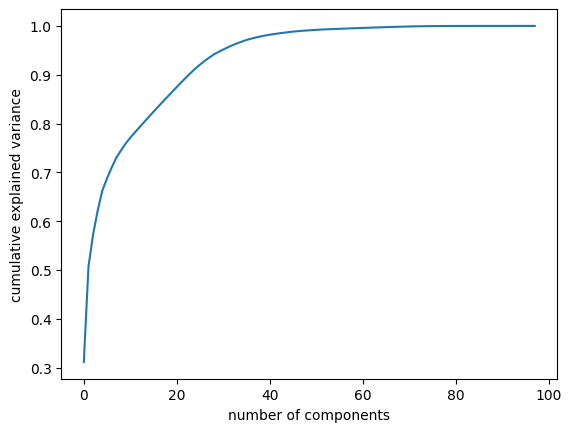

In [77]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt # for plotting

from sklearn.preprocessing import StandardScaler

pca = PCA()

sc = StandardScaler()
x_std = sc.fit_transform(x)

x_std_pca = pca.fit(x_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [107]:
pca = PCA(n_components = 0.9)
x_std_pca = pca.fit_transform(x_std) # this will fit and reduce dimensions
print(pca.n_components_) # one can print and see how many components are selected. In this case it is 4 same as above we saw in step 5
pca = PCA(n_components =pca.n_components_)
x_std_pca = pca.fit_transform(x_std)

# origianl
case14_df_pca=pd.DataFrame(x_std_pca, columns = ['col_'+str(i) for i in range(pca.n_components_)])
pca.explained_variance_ratio_
case14_df_pca

24


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23
0,-10.095797,0.185609,-0.042190,0.912738,-0.243005,-1.060934,0.540408,0.049829,-0.672186,-0.406583,...,0.082293,-0.169204,-0.343633,-0.260421,0.302299,-0.122226,-0.203221,-0.557020,-1.171697,0.416023
1,-10.211332,0.181778,-0.122365,0.961775,-0.128452,-1.272384,0.813930,0.001935,-0.647791,-0.191643,...,-0.142306,1.152809,-0.773297,-0.573557,1.117152,-0.602661,-0.741135,-2.005026,-0.188866,-0.200703
2,-10.210984,0.102119,0.036108,0.887699,-0.047161,-1.493946,0.982483,-0.057719,-0.718605,-0.176241,...,-0.198151,0.787736,-0.209601,-0.821705,0.967943,-0.010015,-0.449312,-1.432389,-0.603481,0.375306
3,-10.241009,0.090094,0.030874,0.921001,-0.128659,-1.443636,0.833882,0.018483,-0.869262,-0.106307,...,0.274563,0.702218,0.420316,0.077902,-0.631282,0.760328,0.429605,1.015560,0.251914,0.305142
4,-10.069977,0.089856,0.267863,0.593542,-0.386886,-1.394990,0.924996,-0.006645,-0.705112,-0.187528,...,-0.035755,-0.940982,-0.346654,0.340691,-0.043684,-0.643464,-0.212910,-0.362631,-0.696374,0.145679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,-7.073493,-0.606907,-0.916747,0.942833,-0.007092,0.736910,-0.264072,-0.597233,-0.135188,-1.472456,...,0.597290,1.506911,-0.188711,-0.177598,-0.341975,-0.843669,-1.846903,-1.573079,-0.760125,0.776727
17516,-7.825031,-0.587831,-0.481184,1.074963,-0.462321,0.549626,-0.475285,-0.882910,-0.413306,-1.652999,...,1.234277,0.205647,0.680767,-1.932249,0.845017,-1.038124,2.265960,0.647545,0.148153,0.672420
17517,-7.358197,-0.759997,-1.166363,1.244228,0.338245,0.863034,-0.440539,-0.434283,-0.184739,-0.539773,...,0.921898,1.507214,-0.089609,-0.477726,0.869499,-1.157618,0.620145,-0.577045,0.949995,0.088701
17518,-7.820613,-0.800324,-1.054571,1.337215,0.121062,1.100479,-0.488468,-0.646931,-0.137723,-0.798611,...,-1.075114,-1.696802,-0.462159,0.362303,0.364101,0.524980,0.164322,-0.592000,0.110996,0.197691


In [108]:
merge_df = pca_df[['date','OT']]

In [105]:
merge_df

,date,OT
0,2022-01-01 00:00:00,0.0
1,2022-01-01 01:00:00,0.0
2,2022-01-01 02:00:00,0.0
3,2022-01-01 03:00:00,0.0
4,2022-01-01 04:00:00,0.0
...,...,...
17515,2023-12-31 19:00:00,0.0
17516,2023-12-31 20:00:00,0.0
17517,2023-12-31 21:00:00,0.0
17518,2023-12-31 22:00:00,0.0


In [109]:
result_df = pd.concat([merge_df,case14_df_pca],axis=1)
result_df.to_csv("clean_dataset/s3_case1_from_s2_case_4_1_with_PCA_0.9.csv")